## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

The first thing we need to do is mount the data into the colab so we can anaylis the data. The data is about the Teroris activities around the world. 
The data is huge and we decided to do this in a team and we are 5 members in total.


In [1]:
#imporitng the importent library that are import for the EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline 

In [2]:
#importing data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/Colab Notbook/Global Terrorism Data.csv"

In [4]:
data= pd.read_csv(file_path, encoding="latin-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [7]:
data.shape

(181691, 135)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


**Note:** The data contains 135 columns and some of the columns have either null values or we don not need them for our analysis. So we will take the columns that are necassary for understanding the data.


# **Cleaning the Data**

In [9]:
#renaming the columns not written properly.
data.rename(columns={'eventid':'event_id','iyear':'year','imonth':'month','iday':'day','approxdate':'date','country_txt':'Country','region_txt':'region_wise', 'provstate':'state','attacktype1_txt':'attack_type','targtype1_txt':'target','gname':'organisation_name','motive':'Motive','weaptype1_txt':'weapon_type','nkill':'killed','nwound':'wounded',},inplace=True)


In [10]:
#Slecting columns that are necessary for the anaylsis.
data=data[['event_id', 'year', 'month', 'day','region_wise', 'state', 'city','Country', 'latitude', 'longitude', 'location','suicide','target','Motive','organisation_name','killed','wounded','summary','weapon_type','attack_type']]

In [11]:
data.head()


,event_id,year,month,day,region_wise,state,city,Country,latitude,longitude,location,suicide,target,Motive,organisation_name,killed,wounded,summary,weapon_type,attack_type
0,197000000001,1970,7,2,Central America & Caribbean,NaN,Santo Domingo,Dominican Republic,18.456792,-69.951164,NaN,0,Private Citizens & Property,NaN,MANO-D,1.0,0.0,NaN,Unknown,Assassination
1,197000000002,1970,0,0,North America,Federal,Mexico city,Mexico,19.371887,-99.086624,NaN,0,Government (Diplomatic),NaN,23rd of September Communist League,0.0,0.0,NaN,Unknown,Hostage Taking (Kidnapping)
2,197001000001,1970,1,0,Southeast Asia,Tarlac,Unknown,Philippines,15.478598,120.599741,NaN,0,Journalists & Media,NaN,Unknown,1.0,0.0,NaN,Unknown,Assassination
3,197001000002,1970,1,0,Western Europe,Attica,Athens,Greece,37.997490,23.762728,NaN,0,Government (Diplomatic),NaN,Unknown,NaN,NaN,NaN,Explosives,Bombing/Explosion
4,197001000003,1970,1,0,East Asia,Fukouka,Fukouka,Japan,33.580412,130.396361,NaN,0,Government (Diplomatic),NaN,Unknown,NaN,NaN,NaN,Incendiary,Facility/Infrastructure Attack


In [12]:
#list of columns we are going to use for our anaylisis.
data.columns

Index(['event_id', 'year', 'month', 'day', 'region_wise', 'state', 'city',
       'Country', 'latitude', 'longitude', 'location', 'suicide', 'target',
       'Motive', 'organisation_name', 'killed', 'wounded', 'summary',
       'weapon_type', 'attack_type'],
      dtype='object')

In [13]:
data.head()

,event_id,year,month,day,region_wise,state,city,Country,latitude,longitude,location,suicide,target,Motive,organisation_name,killed,wounded,summary,weapon_type,attack_type
0,197000000001,1970,7,2,Central America & Caribbean,NaN,Santo Domingo,Dominican Republic,18.456792,-69.951164,NaN,0,Private Citizens & Property,NaN,MANO-D,1.0,0.0,NaN,Unknown,Assassination
1,197000000002,1970,0,0,North America,Federal,Mexico city,Mexico,19.371887,-99.086624,NaN,0,Government (Diplomatic),NaN,23rd of September Communist League,0.0,0.0,NaN,Unknown,Hostage Taking (Kidnapping)
2,197001000001,1970,1,0,Southeast Asia,Tarlac,Unknown,Philippines,15.478598,120.599741,NaN,0,Journalists & Media,NaN,Unknown,1.0,0.0,NaN,Unknown,Assassination
3,197001000002,1970,1,0,Western Europe,Attica,Athens,Greece,37.997490,23.762728,NaN,0,Government (Diplomatic),NaN,Unknown,NaN,NaN,NaN,Explosives,Bombing/Explosion
4,197001000003,1970,1,0,East Asia,Fukouka,Fukouka,Japan,33.580412,130.396361,NaN,0,Government (Diplomatic),NaN,Unknown,NaN,NaN,NaN,Incendiary,Facility/Infrastructure Attack


In [14]:
#new data shape
data.shape

(181691, 20)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   event_id           181691 non-null  int64  
 1   year               181691 non-null  int64  
 2   month              181691 non-null  int64  
 3   day                181691 non-null  int64  
 4   region_wise        181691 non-null  object 
 5   state              181270 non-null  object 
 6   city               181257 non-null  object 
 7   Country            181691 non-null  object 
 8   latitude           177135 non-null  float64
 9   longitude          177134 non-null  float64
 10  location           55495 non-null   object 
 11  suicide            181691 non-null  int64  
 12  target             181691 non-null  object 
 13  Motive             50561 non-null   object 
 14  organisation_name  181691 non-null  object 
 15  killed             171378 non-null  float64
 16  wo

In [16]:
#null values in the data.
data.isnull().sum()

event_id                  0
year                      0
month                     0
day                       0
region_wise               0
state                   421
city                    434
Country                   0
latitude               4556
longitude              4557
location             126196
suicide                   0
target                    0
Motive               131130
organisation_name         0
killed                10313
wounded               16311
summary               66129
weapon_type               0
attack_type               0
dtype: int64

In [17]:
#filling null values with 0 and adding new column for Total Casuality
data['killed']= data['killed'].fillna(0)
data['wounded']= data['wounded'].fillna(0)
data['Total Casualities']=data['killed']+data['wounded']


In [18]:
data.describe()

,event_id,year,month,day,latitude,longitude,suicide,killed,wounded,Total Casualities
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.036507,2.266860,2.883296,5.150156
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.187549,11.227057,34.309747,40.555416
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,0.000000,2.000000,2.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1570.000000,8191.000000,9574.000000


# **Observation**
1. The data consist of terrorist activities from year 1970 to 2017. 
2. The total number of casualities were 9574.
3. Total peopel killed 1570.
4. Number of people wounded 8191.


# **Visualizing** **the** **Data**



# **Correlation Analysis**





In [19]:
data.corr()

,event_id,year,month,day,latitude,longitude,suicide,killed,wounded,Total Casualities
event_id,1.000000,0.999996,0.002706,0.018336,0.166886,0.003907,0.137743,0.021263,0.017492,0.020684
year,0.999996,1.000000,0.000139,0.018254,0.166933,0.003917,0.137736,0.021252,0.017484,0.020675
month,0.002706,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003071,0.004031,0.003178,0.003805
day,0.018336,0.018254,0.005497,1.000000,0.003423,-0.002285,0.003593,-0.003225,-0.001082,-0.001808
latitude,0.166886,0.166933,-0.015978,0.003423,1.000000,0.001463,0.068682,-0.013170,0.015920,0.009899
longitude,0.003907,0.003917,-0.003880,-0.002285,0.001463,1.000000,0.000486,-0.000587,0.000205,0.000013
suicide,0.137743,0.137736,0.003071,0.003593,0.068682,0.000486,1.000000,0.136385,0.096101,0.119057
killed,0.021263,0.021252,0.004031,-0.003225,-0.013170,-0.000587,0.136385,1.000000,0.443326,0.651885
wounded,0.017492,0.017484,0.003178,-0.001082,0.015920,0.000205,0.096101,0.443326,1.000000,0.968724
Total Casualities,0.020684,0.020675,0.003805,-0.001808,0.009899,0.000013,0.119057,0.651885,0.968724,1.000000


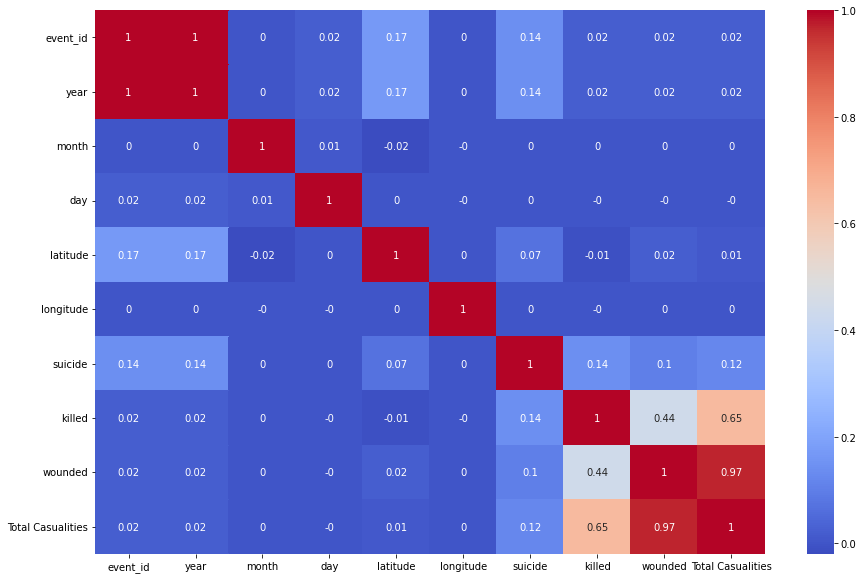

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(np.round(data.corr(),2),annot=True, cmap="coolwarm")

**INFERENCE:**
Above graph is correlation heapmap graph showing the relation in between the data and as shown in the graph relation between **killed** and **wounded** and vice versa is more related than any other. As this data is about terrorism, it's not unusual that the killed and wounded data is more  related to each other than any of the other factors.

Through this correlatiin heatmap we can easily figure out which factors are more realted and will analyse about it.


#  Region wise attcks over the years

In [21]:
res= data.groupby('region_wise')['region_wise'].count().sort_values(ascending=False)
res

region_wise
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_wise, dtype: int64

Text(0, 0.5, 'Number of Attacks')

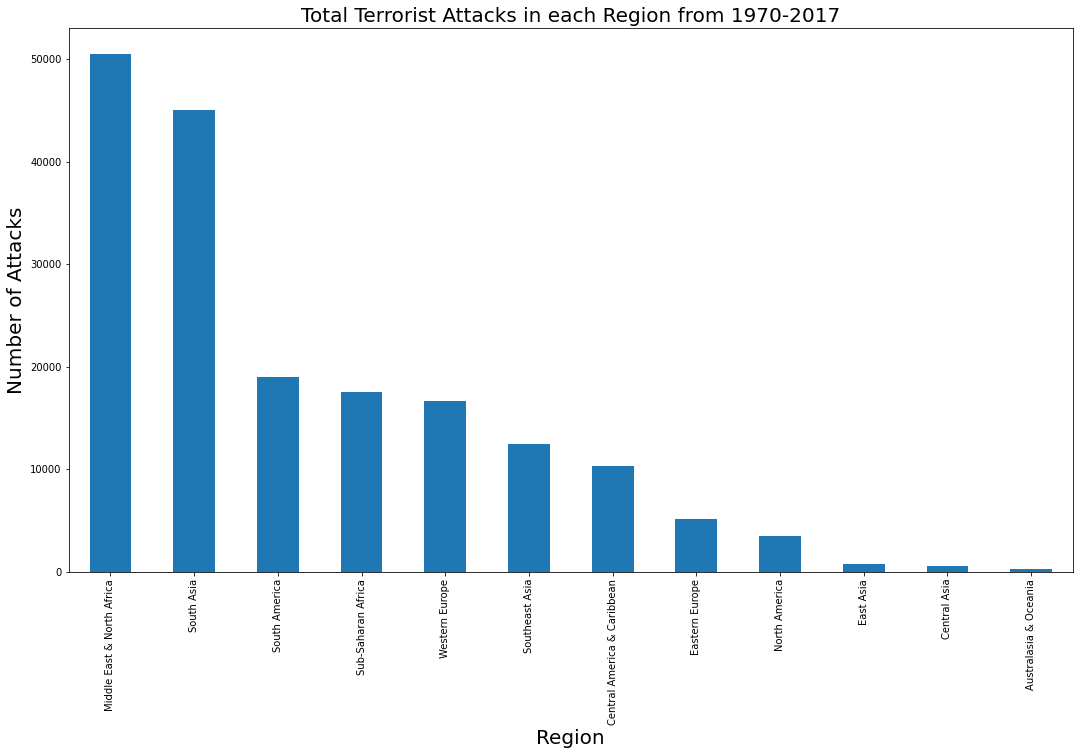

In [22]:
res.plot(kind='bar',figsize=(18,10))
plt.title('Total Terrorist Attacks in each Region from 1970-2017',fontsize=20)
plt.xlabel('Region',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)

**INFERENCE:** 

**Middle East & North Africa** have the most number of attacks over the years following by South Asia and South America


# Total number of Casualities, Killed, and Wounded people by the region.

In [23]:
data.head()

,event_id,year,month,day,region_wise,state,city,Country,latitude,longitude,...,suicide,target,Motive,organisation_name,killed,wounded,summary,weapon_type,attack_type,Total Casualities
0,197000000001,1970,7,2,Central America & Caribbean,NaN,Santo Domingo,Dominican Republic,18.456792,-69.951164,...,0,Private Citizens & Property,NaN,MANO-D,1.0,0.0,NaN,Unknown,Assassination,1.0
1,197000000002,1970,0,0,North America,Federal,Mexico city,Mexico,19.371887,-99.086624,...,0,Government (Diplomatic),NaN,23rd of September Communist League,0.0,0.0,NaN,Unknown,Hostage Taking (Kidnapping),0.0
2,197001000001,1970,1,0,Southeast Asia,Tarlac,Unknown,Philippines,15.478598,120.599741,...,0,Journalists & Media,NaN,Unknown,1.0,0.0,NaN,Unknown,Assassination,1.0
3,197001000002,1970,1,0,Western Europe,Attica,Athens,Greece,37.997490,23.762728,...,0,Government (Diplomatic),NaN,Unknown,0.0,0.0,NaN,Explosives,Bombing/Explosion,0.0
4,197001000003,1970,1,0,East Asia,Fukouka,Fukouka,Japan,33.580412,130.396361,...,0,Government (Diplomatic),NaN,Unknown,0.0,0.0,NaN,Incendiary,Facility/Infrastructure Attack,0.0


In [24]:
#total number of casualities in diffrent regions.
total_casuality=data[["region_wise","Total Casualities"]].groupby("region_wise").sum().sort_values(by="Total Casualities",ascending=False)
total_casuality

,Total Casualities
region_wise,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


Total Casualities = Killed persons + Wounded persons in each region

Text(0, 0.5, 'Number of Casualities')

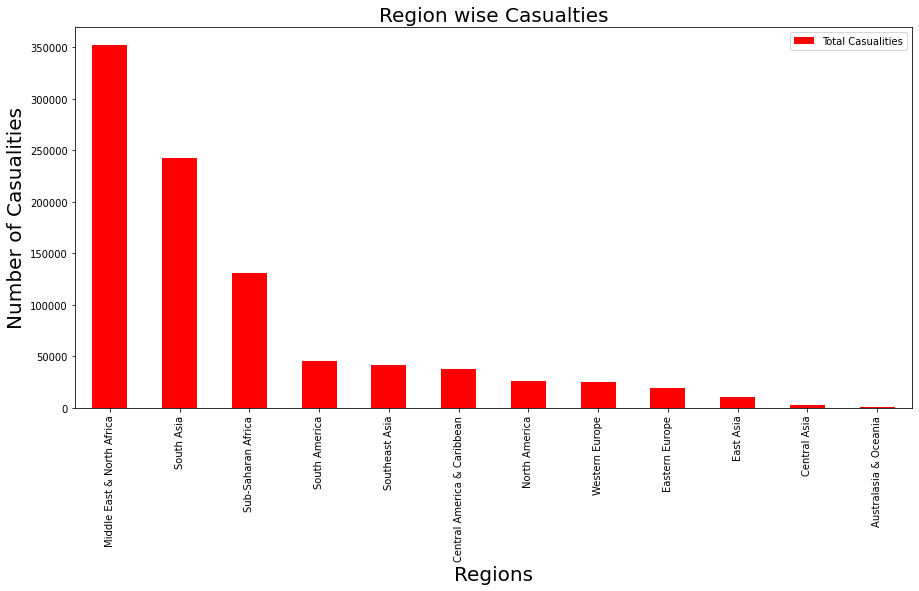

In [25]:
total_casuality.plot(kind='bar',color='red',figsize=(15,7))
plt.title('Region wise Casualties',fontsize=20)
plt.xlabel('Regions',fontsize=20)
plt.ylabel('Number of Casualities',fontsize=20)

**INFERENCE:**
Above graph shows the total casualities in deffrent regions and as the graph shows **Middle East & North Africa** have the highest number of casualities.

In [26]:
#total number of people killed in diffrent regions.
killed=data[["region_wise","killed"]].groupby("region_wise").sum().sort_values(by="killed",ascending=False)
killed

,killed
region_wise,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


In [27]:
#Total number of people wounded in differnt regions.
wounded=data[["region_wise","wounded"]].groupby("region_wise").sum().sort_values(by="wounded",ascending=False)
wounded

,wounded
region_wise,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


Text(0, 0.5, 'Number of People Wounded')

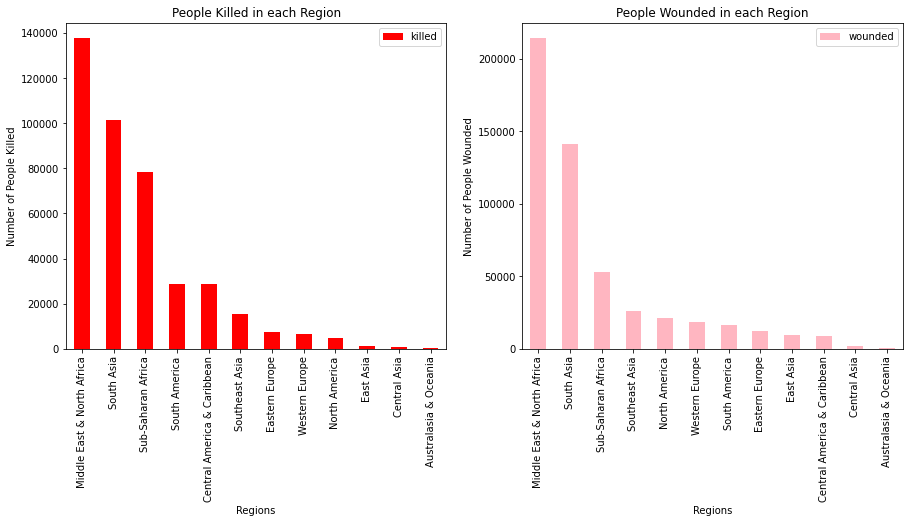

In [28]:
fig=plt.figure(figsize=(15,10))
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
killed.plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#Wounded
wounded.plot(kind="bar",color="lightpink",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

**INFERENCE:**
Left hand bar graph shows the number of people killed in each region over the period of year and the right hand bar graph showes the number of people wounded in diffrent region.

As we can see in both the graph that number of killed and number of wounded people are higher in **Middle & North Africa**

# **Attacks according to year wise**

In [29]:
year_wise_attcks = data['year'].value_counts().sort_index(ascending=False).reset_index().rename(columns={'index':'Year','year':'Attacks'}).set_index("Year")
year_wise_attcks.head()

,Attacks
Year,
2017,10900
2016,13587
2015,14965
2014,16903
2013,12036


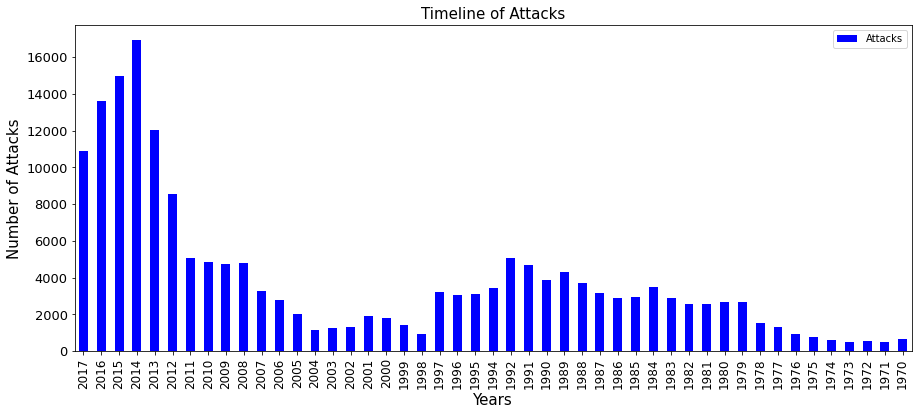

In [30]:
year_wise_attcks.plot(kind="bar",color="blue",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

**INFERENCE:**
Above graph showes the number of attacks happened in every year.


*   As we can see the year with most attcks is 2014 with 16903 attacks. 
*   Least number of attacks is 471 in 1971.



  




# **Country Wise Attacks Top 10**

In [31]:
#country wise attacks
country_wise= data["Country"].value_counts().head(10)
country_wise

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

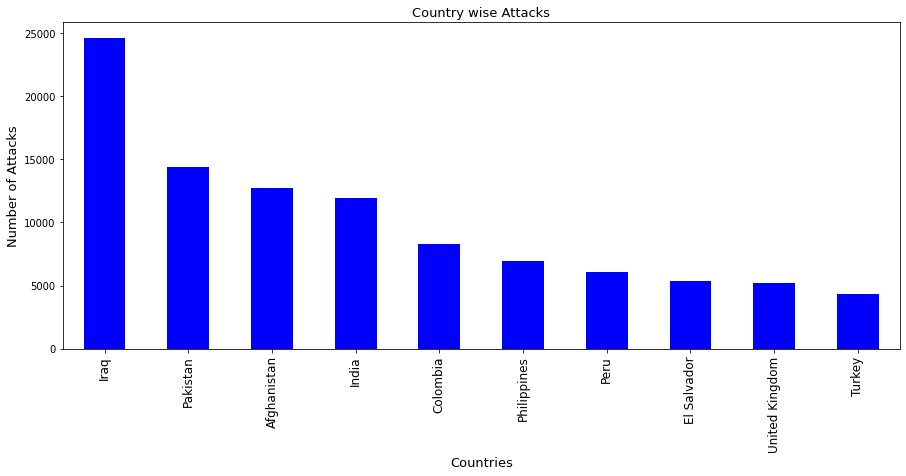

In [32]:
country_wise.plot(kind="bar",color="blue",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

**INFERENCE:**
Above graph shows that the **Iraq** have the most number of attacks following  by country Pakistan and Afganistan.

In [33]:
#total casualities in different countries(showing top 10)
total_casuality=data[["Country","Total Casualities"]].groupby("Country").sum().sort_values(by="Total Casualities",ascending=False)
total_casuality.head(10)

,Total Casualities
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


Text(0, 0.5, 'Number of Casualties')

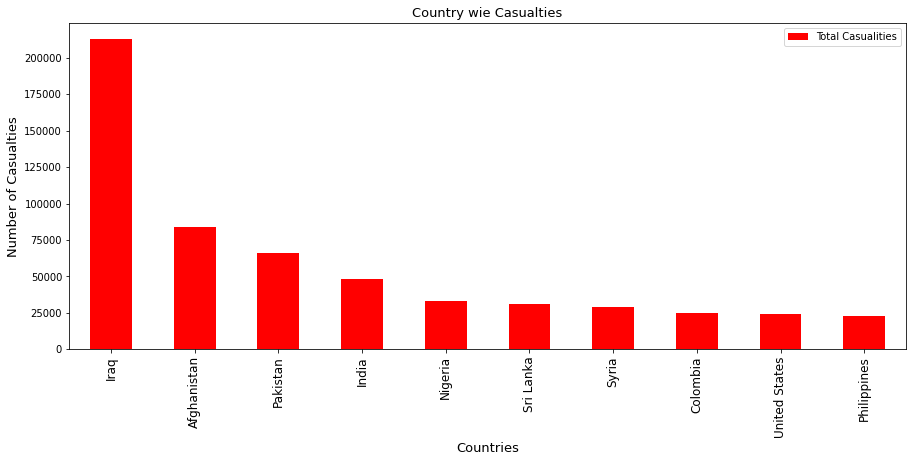

In [34]:
total_casuality[:10].plot(kind="bar",color="red",figsize=(15,6))
plt.title("Country wie Casualties",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)


**INFERENCE:**
Above graph showes the total number of casualities of different countries.
As we can see clearly in the graph **Iraq** have most number of casualities than any other country.

In [35]:
#number of people killed in each country (showing top 10)
killed=data[["Country","killed"]].groupby("Country").sum().sort_values(by="killed",ascending=False)
killed.head(10)

,killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


In [36]:
#number of people wounded in each country (showing top 10)
wounded=data[["Country","wounded"]].groupby("Country").sum().sort_values(by="wounded",ascending=False)
wounded.head(10)

,wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


Text(0, 0.5, 'Number of People Wounded')

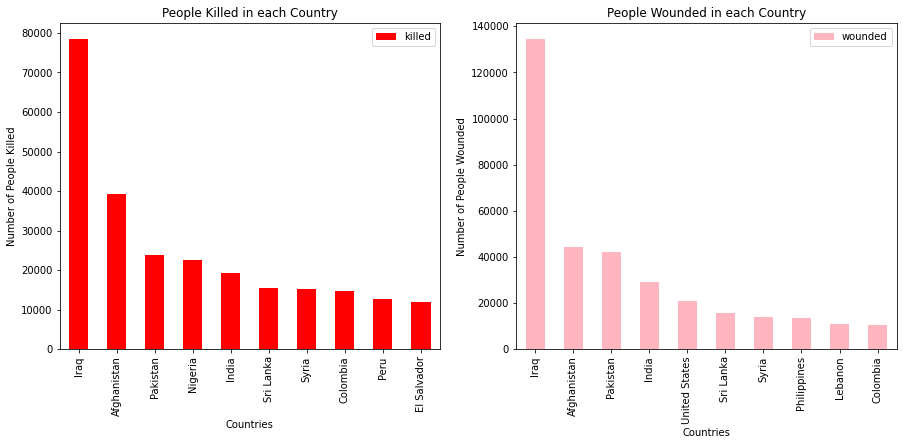

In [37]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#subplot_killed
killed[:10].plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")

#subplot_wounded
wounded[:10].plot(kind="bar",color="lightpink",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

**INFERENCE:**
Above graph shows the the killed and wounded people of different countries.


1.   Left hand graph shows that **Iraq** have most number of killed people.
2.   right hand graph shows that **Iraq** have most number of wounded people aslo.



#  **City Wise Attacks**

In [38]:
#city wise attacks
city_wise=data["city"].value_counts()[1:11].head(10)
city_wise

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: city, dtype: int64

Text(0, 0.5, 'Number of Attacks')

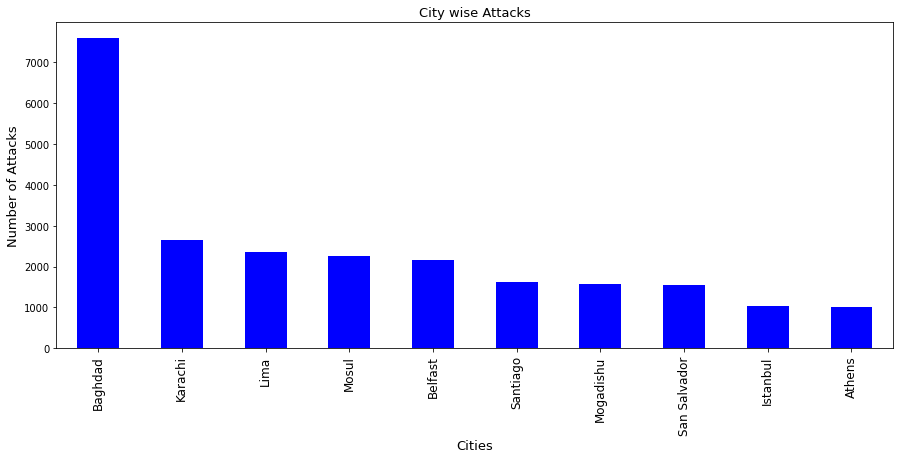

In [39]:
city_wise.plot(kind="bar",color="blue",figsize=(15,6))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)


**INFERENCE:**
Above graph showes the number of attacks happened in the diffrenent cities.
As we can see that **Baghdad** with **7589** attacks is on top, so Baghdad is consider as the hotspot of terrorism.

In [40]:
#number of total casualities from different cities(showing top 10)
city_wise=data[["city","Total Casualities"]].groupby("city").sum().sort_values(by="Total Casualities",ascending=False).drop("Unknown")
city_wise.head(10)

,Total Casualities
city,
Baghdad,77876.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0
Colombo,5906.0


Text(0, 0.5, 'Number of Casualties')

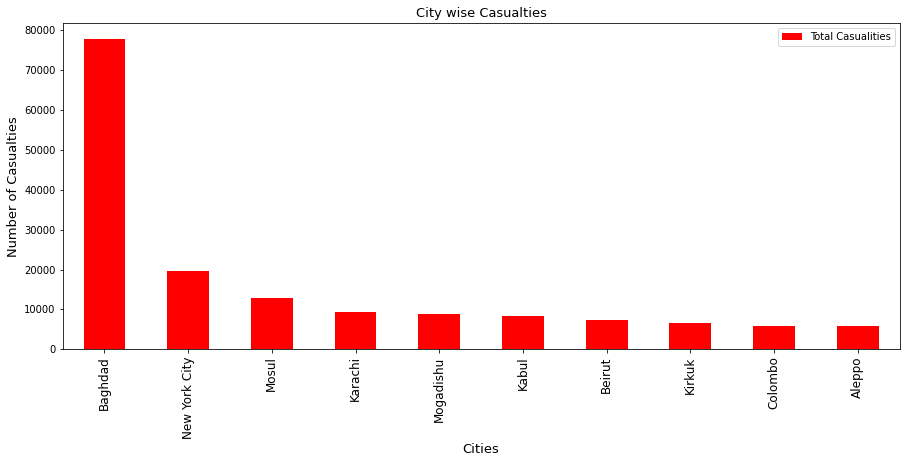

In [41]:
city_wise[:10].plot(kind="bar",color="red",figsize=(15,6))
plt.title("City wise Casualties",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)


**Inference:**
Above graph shows the number of people killed in different cities and clearly shown in the graph that Baghdad is at top.

In [42]:
#number of people killed in diffrent cities (showing top 10)
killed=data[["city","killed"]].groupby("city").sum().sort_values(by="killed",ascending=False)
killed.head(10)

,killed
city,
Unknown,22647.0
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0


In [43]:
#number os=f wounded people from different cities (showing top 10)
wounded=data[["city","wounded"]].groupby("city").sum().sort_values(by="wounded",ascending=False)
wounded.head(10)

,wounded
city,
Baghdad,56725.0
New York City,16781.0
Unknown,12803.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0


Text(0, 0.5, 'Number of People Wounded')

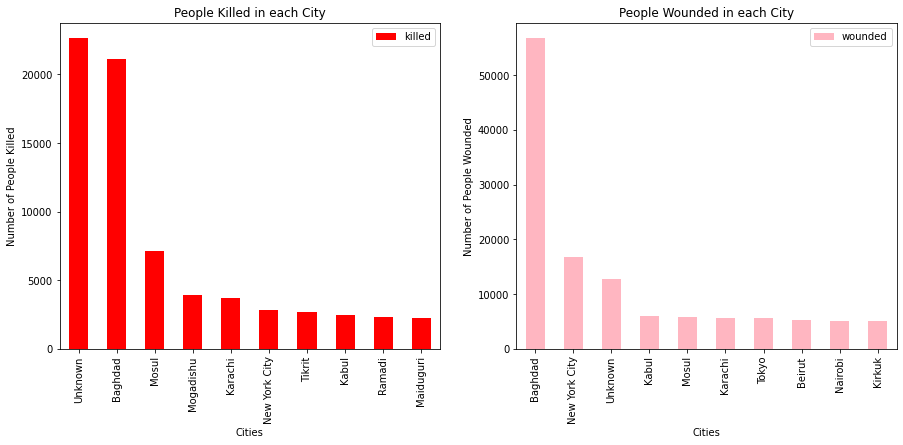

In [44]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#subpl0t_killed
killed[:10].plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of People Killed")

#subplot_wounded
wounded[:10].plot(kind="bar",color="lightpink",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

**INFERENCE:**
Above graph shows the the killed and wounded people of different cities.


1.   Left hand graph shows that **Baghdad** have most number of killed people.
2.   right hand graph shows that **Baghdad** have most number of wounded people aslo.



# **Number of Attacks Organisation Wise**

In [45]:
organisation= data['organisation_name'].value_counts()[0:11]
organisation


Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Name: organisation_name, dtype: int64

Text(0, 0.5, 'Number of Attacks')

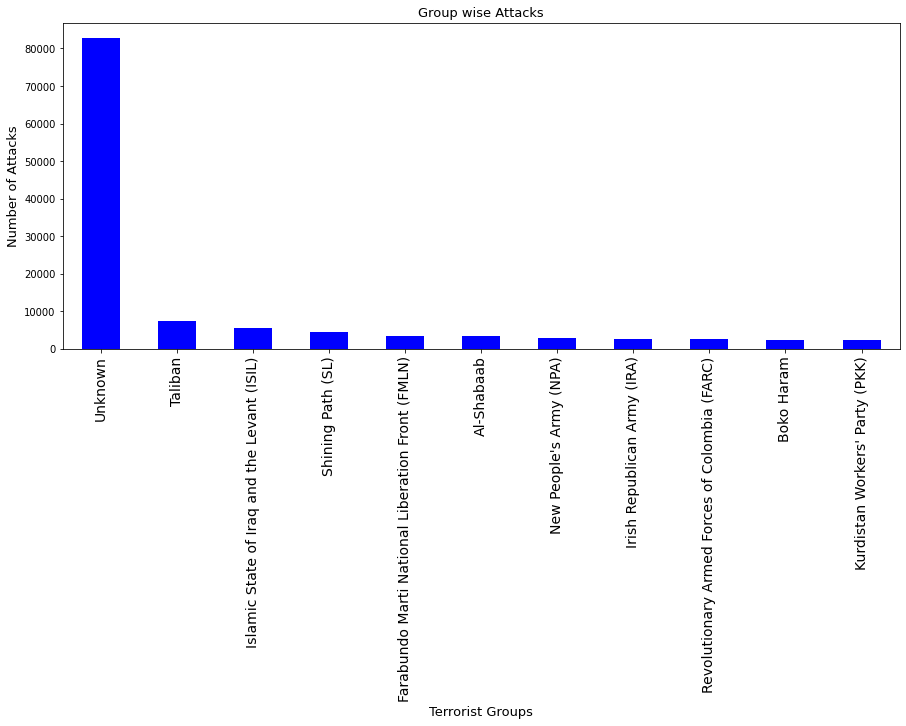

In [46]:
organisation.plot(kind="bar",color="blue",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=14)
plt.ylabel("Number of Attacks",fontsize=13)


**INFERENCE:**
Above graph showes the attacks by the different organisations and as the graph shoes **Taliban** followed by Islamic State of Iraq and the Levant (ISIL)        


# **Methods of attacks**

In [47]:
attack_type= data['attack_type'].value_counts()
attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attack_type, dtype: int64

Text(0.5, 0, 'Attack_type')

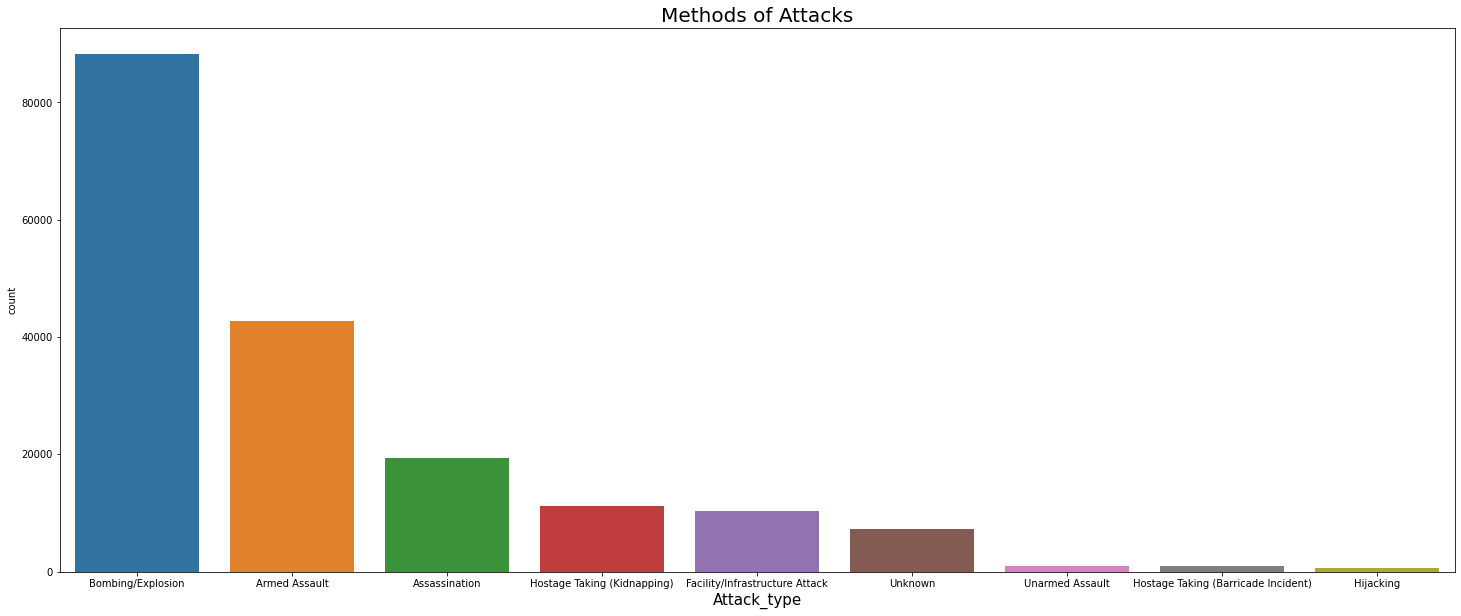

In [48]:
plt.figure(figsize=(25,10))
sns.countplot(x=data['attack_type'],order = data['attack_type'].value_counts().index)
plt.title("Methods of Attacks",fontsize=20)
plt.xlabel("Attack_type",fontsize=15)


**INFERENCE:**
Above graph shows the methods of the attacks happened over the period of time from 1970 to 2017. As we can see in above graph that the terrorist prefer **Bombing/Explosion** than any other method.
The most rare type of attack terrorists used is Hijacking.


In [49]:
#anaylising the total number of casualities done by diffrent types of attacks.
casuality=data[["attack_type","Total Casualities"]].groupby("attack_type").sum().sort_values(by="Total Casualities",ascending=False)
casuality

,Total Casualities
attack_type,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Unknown,47106.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


Text(0, 0.5, 'Number of Casualties')

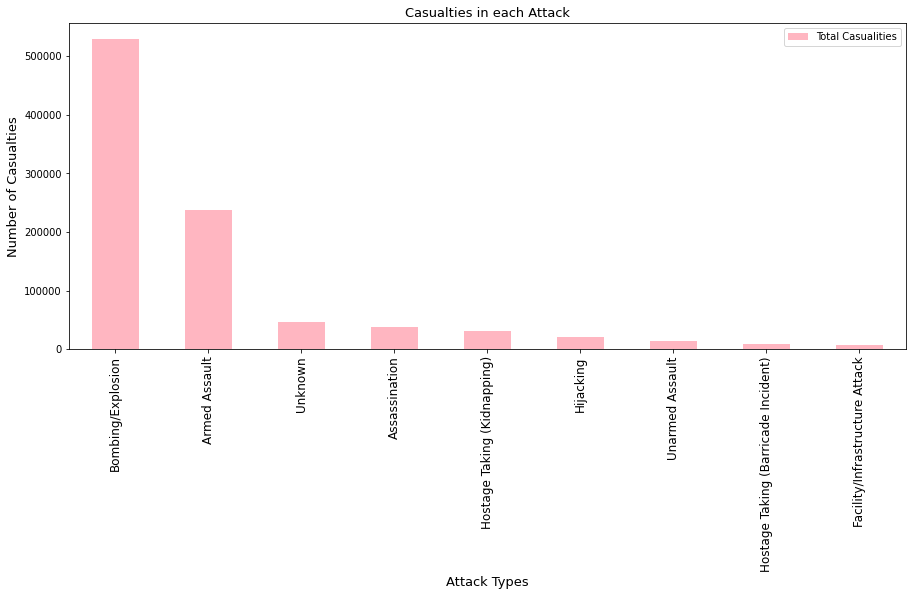

In [50]:
casuality.plot(kind="bar",color="lightpink",figsize=(15,6))
plt.title("Casualties in each Attack",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)


**INFERENCE:**
As above graph shows that the Bombing/Explosion causes the more casualities than any other type of attacks, not even close to Armed Assault.

In [51]:
#number of people killed in diffrenent types of attacks.
killed=data[["attack_type","killed"]].groupby("attack_type").sum().sort_values(by="killed",ascending=False)
killed

,killed
attack_type,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


In [52]:
#number of people wounded in diffrent types of attacks.
wounded=data[["attack_type","wounded"]].groupby("attack_type").sum().sort_values(by="wounded",ascending=False)
wounded

,wounded
attack_type,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unknown,14725.0
Unarmed Assault,14027.0
Assassination,13887.0
Hostage Taking (Kidnapping),6446.0
Hostage Taking (Barricade Incident),3966.0
Facility/Infrastructure Attack,3765.0


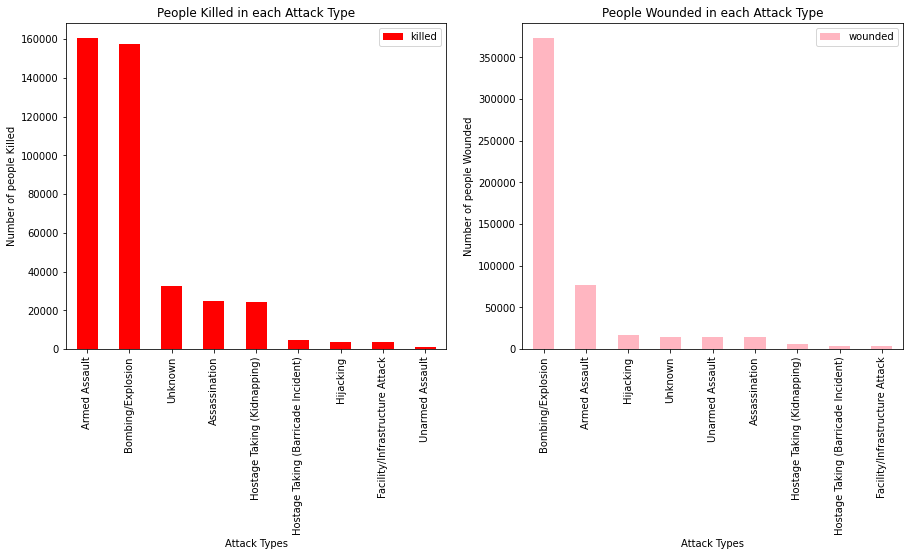

In [53]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#subplot_illed
killed.plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Attack Type")
ax0.set_xlabel("Attack Types")
ax0.set_ylabel("Number of people Killed")

#sub_plotwounded
wounded.plot(kind="bar",color="lightpink",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Attack Type")
ax1.set_xlabel("Attack Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

**INFERENCE:**
Above graphs shows the killed and wounded people from different attack types.



*   As shown in left hand side graph **Armed Assault** killed more people than any other type of attacks. 
*   As shown in right hand side graph **Bombing/Explosion	** woundedthe  more people than any other type of attacks. 



# **Top terrorist groups in Indian and famous attack type**

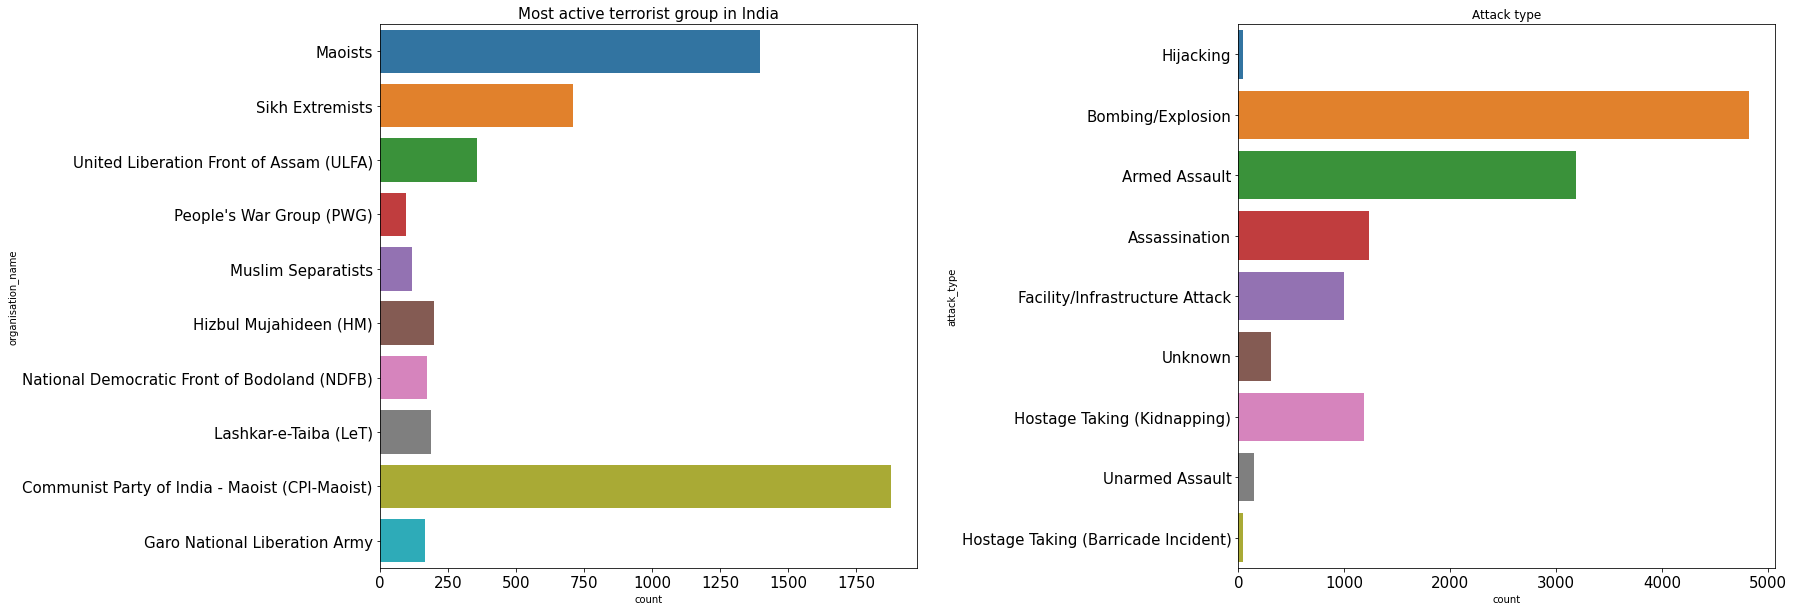

In [54]:
fig=plt.figure(figsize=(25,10))
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

terror_india = data[data['Country']== "India"]
ind_group = terror_india["organisation_name"].value_counts()[1:11].index
ind_group= terror_india[terror_india["organisation_name"].isin(ind_group)]
sns.countplot(y="organisation_name", data=ind_group,ax=ax0)
ax0.set_title("Most active terrorist group in India",fontsize=15)
plt.subplots_adjust(hspace=0.3, wspace=0.6)
sns.countplot(y="attack_type",data=terror_india,ax=ax1)
ax1.set_title("Most use Attack Type",fontsize=15)
ax1.set_title("Attack type")
ax0.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)

**INFERENCE:**
Above graphs shows the top terrorist groups in India and most use attack type in India.

*   Left hand graph shows the most active terrorist gruops in India and on top is **Communist Party Of India - Maoist (CPI_Maoist)**
*   Right hand graph shows the most used acctack type in India and on top is **Bombing/Explosion**.





# **Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017**



*   Total Casualties (Killed + Wounded) due to Terrorist Attacks







In [55]:
total_casualities = data.loc[:,'Total Casualities'].sum()
print(f"Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world is\n {total_casualities}")


Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world is
 935737.0




*   Total people killed by Terrorist activities




In [56]:
killed = data.loc[:,'killed'].sum()
print(f"Total number of Killed due to Terrorist Attacks from 1970 to 2017 across the world is\n {killed}")

Total number of Killed due to Terrorist Attacks from 1970 to 2017 across the world is
 411868.0




*   Total people wounded in Terrorist activitiese




In [57]:
wounded = data.loc[:,'wounded'].sum()
print(f"Total number of Wounded due to Terrorist Attacks from 1970 to 2017 across the world is\n {wounded}")

Total number of Wounded due to Terrorist Attacks from 1970 to 2017 across the world is
 523869.0




*  Number of attacks in 1970 and in 2017 and  the percentage have increased.




In [58]:
year=data['year'].value_counts().to_dict()
rate=((year[2017]-year[1970]))/year[2017]*100
print(f"{year[1970]} attacks happened in 1970 and {year[2017]} attacks happened in 2017")
print(f"The percentage of attacks from 1970 to 2017 is increased by {np.round(rate,0)}")

651 attacks happened in 1970 and 10900 attacks happened in 2017
The percentage of attacks from 1970 to 2017 is increased by 94.0


**Conclusion**
We came to the end of the peoject!

Threough this data set of "Global Terrorism", I have come to many answers. This data consists of terrorist acticities of all over the world from 1970 to 2017. Data was full of null values and extra details that were not necessary for the anaylisis, so first I cleaned the data and select the data that were necessary than i go thorugh the analysis . I have also used Seaborn and matplotlib charts for the data visualization.

The answers I have obtain from the data are:

1. **Middle East & North Africa region** have the most terrorist activites around the world with  50474 attacks from 1970 to 2017.

2. The top country with the heighest number of attack is **Iraq** with   24636 attacks from 1970 to 2017.

3. **Baghdad** is the country have the most number of attacks than any other country with 7589 attacks  from 1970 to 2017, so so the **Baghdad** is the hotstop country of terrorism around the world.

4. What about the popular terrorist group? **Taliban** is the most active terrorist group.

5. The number people killed from 1970 to 2017 by terrorist acitvity is **411868** and it is not very good.

6. Most used attack type method of terrorist is **Bombing/Explosion**.

7. **Communist Party Of India - Maoist (CPI_Maoist)** is the India's most active terrorist group.
 


